In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preprocessed-data/formatted_data_2018-2024.csv
/kaggle/input/preprocessed-data/half_hourly.csv


# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
hourly_df = pd.read_csv('/kaggle/input/preprocessed-data/formatted_data_2018-2024.csv')

In [4]:
hourly_df.head(10)

,id,RouteNumber,SourceId,SourceName,DestinationID,DestinationName,Date_Time,station_pair,holiday_type,is_holiday,total_count,weekday,hour,year,lower_quartile,upper_quartile,final_total_count
0,1422657,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:28:00,Wagle Depot->Thane Station(Satis),0,0,7,2,18,2018,7,7,7
1,1422658,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:28:00,Wagle Depot->Thane Station(Satis),0,0,7,2,18,2018,7,7,7
2,1422660,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:28:00,Wagle Depot->Thane Station(Satis),0,0,7,2,18,2018,7,7,7
3,1422661,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:29:00,Wagle Depot->Thane Station(Satis),0,0,8,2,18,2018,8,8,8
4,1422662,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:29:00,Wagle Depot->Thane Station(Satis),0,0,8,2,18,2018,8,8,8
5,1422663,6,20,Wagle Depot,18,Pradeep Society/Panch Pakhadi,2018-07-25 18:29:00,Wagle Depot->Pradeep Society/Panch Pakhadi,0,0,8,2,18,2018,8,8,8
6,1422664,6,20,Wagle Depot,18,Pradeep Society/Panch Pakhadi,2018-07-25 18:30:00,Wagle Depot->Pradeep Society/Panch Pakhadi,0,0,2,2,18,2018,2,2,2
7,1422665,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:30:00,Wagle Depot->Thane Station(Satis),0,0,2,2,18,2018,2,2,2
8,1422666,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:31:00,Wagle Depot->Thane Station(Satis),0,0,4,2,18,2018,4,4,4
9,1422591,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:25:00,Wagle Depot->Thane Station(Satis),0,0,3,2,18,2018,3,3,3


In [5]:
half_hourly_df = pd.read_csv('/kaggle/input/preprocessed-data/half_hourly.csv')

In [6]:
half_hourly_df.head(10)

,id,RouteNumber,SourceId,SourceName,DestinationID,DestinationName,Date_Time,station_pair,holiday_type,is_holiday,total_count,weekday,half_hourly,year,lower_quartile,upper_quartile,final_total_count
0,1422657,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:28:00,Wagle Depot->Thane Station(Satis),0,0,7,2,37,2018,7,7,7
1,1422658,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:28:00,Wagle Depot->Thane Station(Satis),0,0,7,2,37,2018,7,7,7
2,1422660,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:28:00,Wagle Depot->Thane Station(Satis),0,0,7,2,37,2018,7,7,7
3,1422661,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:29:00,Wagle Depot->Thane Station(Satis),0,0,8,2,37,2018,8,8,8
4,1422662,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:29:00,Wagle Depot->Thane Station(Satis),0,0,8,2,37,2018,8,8,8
5,1422663,6,20,Wagle Depot,18,Pradeep Society/Panch Pakhadi,2018-07-25 18:29:00,Wagle Depot->Pradeep Society/Panch Pakhadi,0,0,8,2,37,2018,8,8,8
6,1422664,6,20,Wagle Depot,18,Pradeep Society/Panch Pakhadi,2018-07-25 18:30:00,Wagle Depot->Pradeep Society/Panch Pakhadi,0,0,2,2,38,2018,2,2,2
7,1422665,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:30:00,Wagle Depot->Thane Station(Satis),0,0,2,2,38,2018,2,2,2
8,1422666,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:31:00,Wagle Depot->Thane Station(Satis),0,0,4,2,38,2018,4,4,4
9,1422591,6,20,Wagle Depot,17,Thane Station(Satis),2018-07-25 18:25:00,Wagle Depot->Thane Station(Satis),0,0,3,2,37,2018,3,3,3


In [85]:
# Taking all the needed data
new_hour = hourly_df[['id', 'Date_Time', 'hour', 'lower_quartile', 'upper_quartile', 'final_total_count']]
new_half_hour = half_hourly_df[['id', 'Date_Time', 'half_hourly', 'lower_quartile', 'upper_quartile', 'final_total_count']]

In [29]:
# Half hourly dataframe
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260165 entries, 0 to 19260164
Data columns (total 17 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   RouteNumber        int64 
 2   SourceId           int64 
 3   SourceName         object
 4   DestinationID      int64 
 5   DestinationName    object
 6   Date_Time          object
 7   station_pair       object
 8   holiday_type       int64 
 9   is_holiday         int64 
 10  total_count        int64 
 11  weekday            int64 
 12  hour               int64 
 13  year               int64 
 14  lower_quartile     int64 
 15  upper_quartile     int64 
 16  final_total_count  int64 
dtypes: int64(13), object(4)
memory usage: 2.4+ GB


In [30]:
half_hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260165 entries, 0 to 19260164
Data columns (total 17 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   RouteNumber        int64 
 2   SourceId           int64 
 3   SourceName         object
 4   DestinationID      int64 
 5   DestinationName    object
 6   Date_Time          object
 7   station_pair       object
 8   holiday_type       int64 
 9   is_holiday         int64 
 10  total_count        int64 
 11  weekday            int64 
 12  half_hourly        int64 
 13  year               int64 
 14  lower_quartile     int64 
 15  upper_quartile     int64 
 16  final_total_count  int64 
dtypes: int64(13), object(4)
memory usage: 2.4+ GB


# Descriptions of features 

## For hourly dataset - hour, final_total_hours, station_pairs
## For half hourly dataset - half_hourly, final_total_hours, station_pairs

### The final_total_count is having the same distribution in both of the datasets.

In [11]:
# hourly dataframe
pd.DataFrame(data = hourly_df['final_total_count'].describe().apply(lambda x: format(x, '.2f')))

,final_total_count
count,19260165.00
mean,14.07
std,7.57
min,1.00
25%,8.00
50%,13.00
75%,19.00
max,210.00


In [12]:
# Half hourly dataframe
pd.DataFrame(data = half_hourly_df['final_total_count'].describe().apply(lambda x: format(x, '.2f')))

,final_total_count
count,19260165.00
mean,14.07
std,7.57
min,1.00
25%,8.00
50%,13.00
75%,19.00
max,210.00


In [166]:
pd.DataFrame(data = hourly_df['upper_quartile'].describe().apply(lambda x: format(x, '.2f')))

,upper_quartile
count,19260165.00
mean,14.07
std,7.57
min,1.00
25%,8.00
50%,13.00
75%,19.00
max,210.00


In [167]:
pd.DataFrame(data = hourly_df['lower_quartile'].describe().apply(lambda x: format(x, '.2f')))

,lower_quartile
count,19260165.00
mean,14.07
std,7.57
min,1.00
25%,8.00
50%,13.00
75%,19.00
max,210.00


In [14]:
# Half hourly dataframe
pd.DataFrame(data = hourly_df['hour'].describe().apply(lambda x: format(x, '.2f')))

,hour
count,19260165.00
mean,13.49
std,5.13
min,0.00
25%,9.00
50%,13.00
75%,18.00
max,23.00


In [13]:
# Half hourly dataframe
pd.DataFrame(data = half_hourly_df['half_hourly'].describe().apply(lambda x: format(x, '.2f')))

,half_hourly
count,19260165.00
mean,28.47
std,10.25
min,1.00
25%,20.00
50%,28.00
75%,38.00
max,48.00


## Plots - Histogram plots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


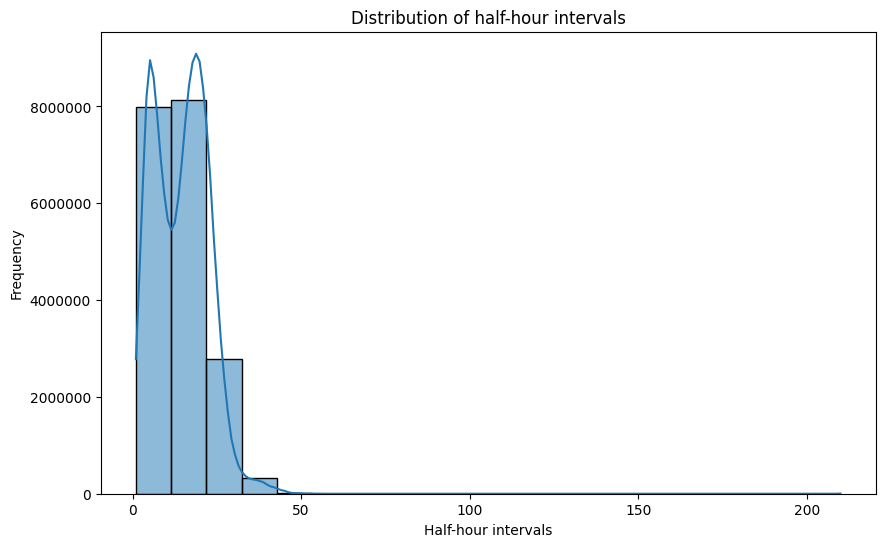

In [35]:
def plot_features(df, feature):
    # Your plot code here
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title('Distribution of half-hour intervals')
    plt.xlabel('Half-hour intervals')
    plt.ylabel('Frequency')

    # Set formatting for tick labels on both x and y axes
    plt.ticklabel_format(style='plain', axis='both')
    plt.show()
    
plot_features(hourly_df, 'final_total_count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


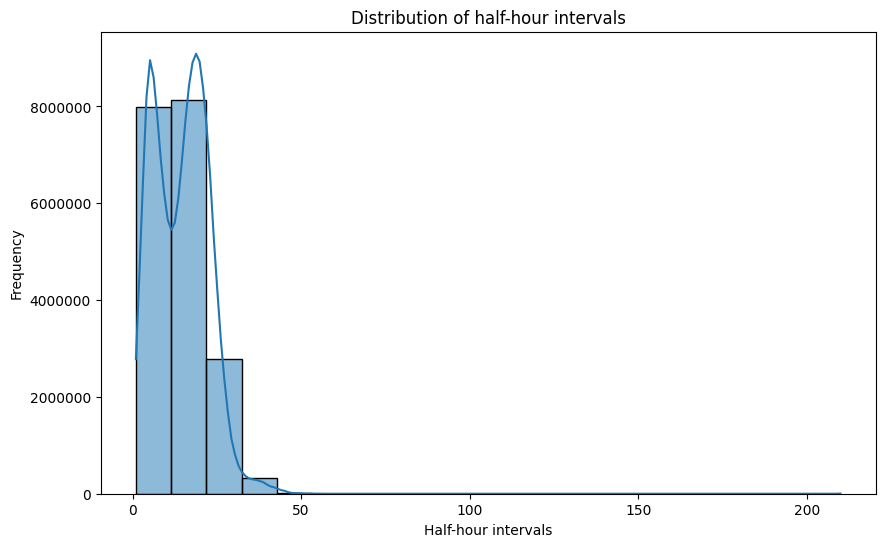

In [39]:
plot_features(half_hourly_df, 'final_total_count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


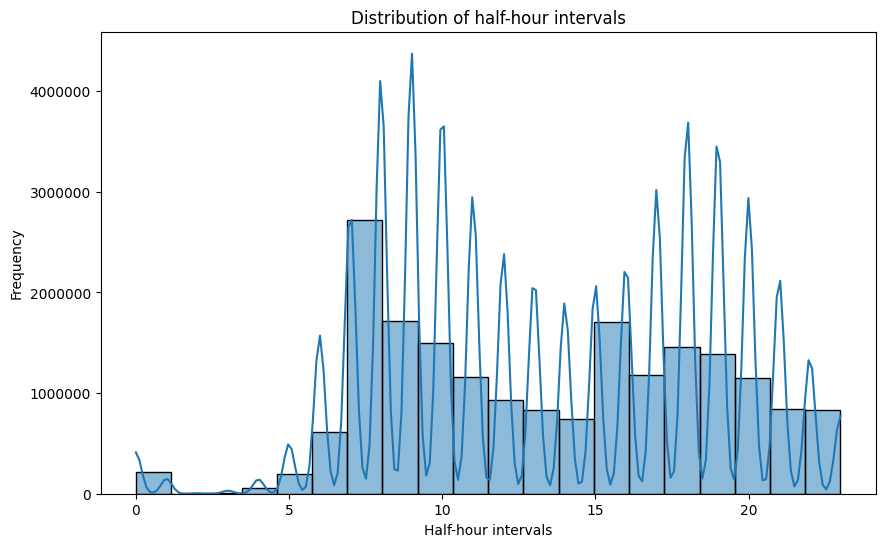

In [40]:
plot_features(hourly_df, 'hour')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


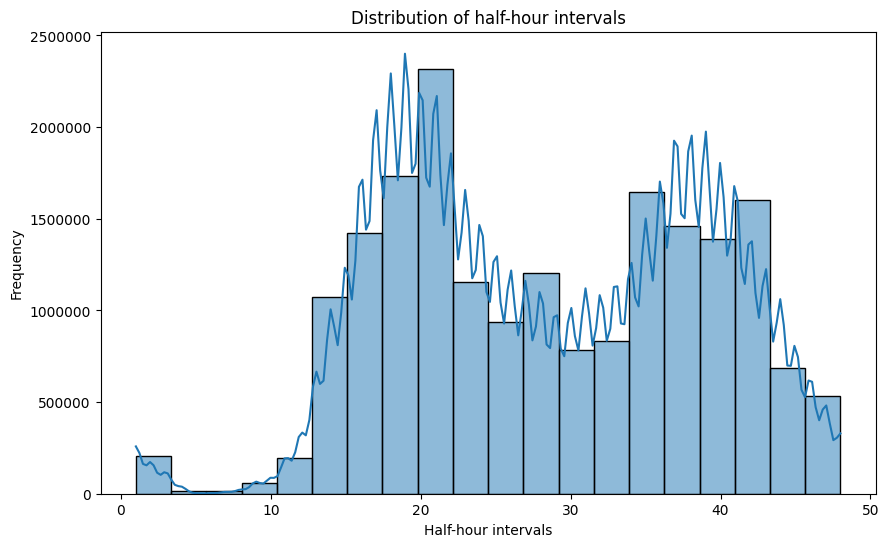

In [41]:
plot_features(half_hourly_df, 'half_hourly')

## Box Plots

In [160]:
def boxplot_features(df, feature1, feature2):
    plt.figure(figsize=(20,6))
    sns.boxplot(x = df[feature1], y = df[feature2])
    plt.title('Box plot')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

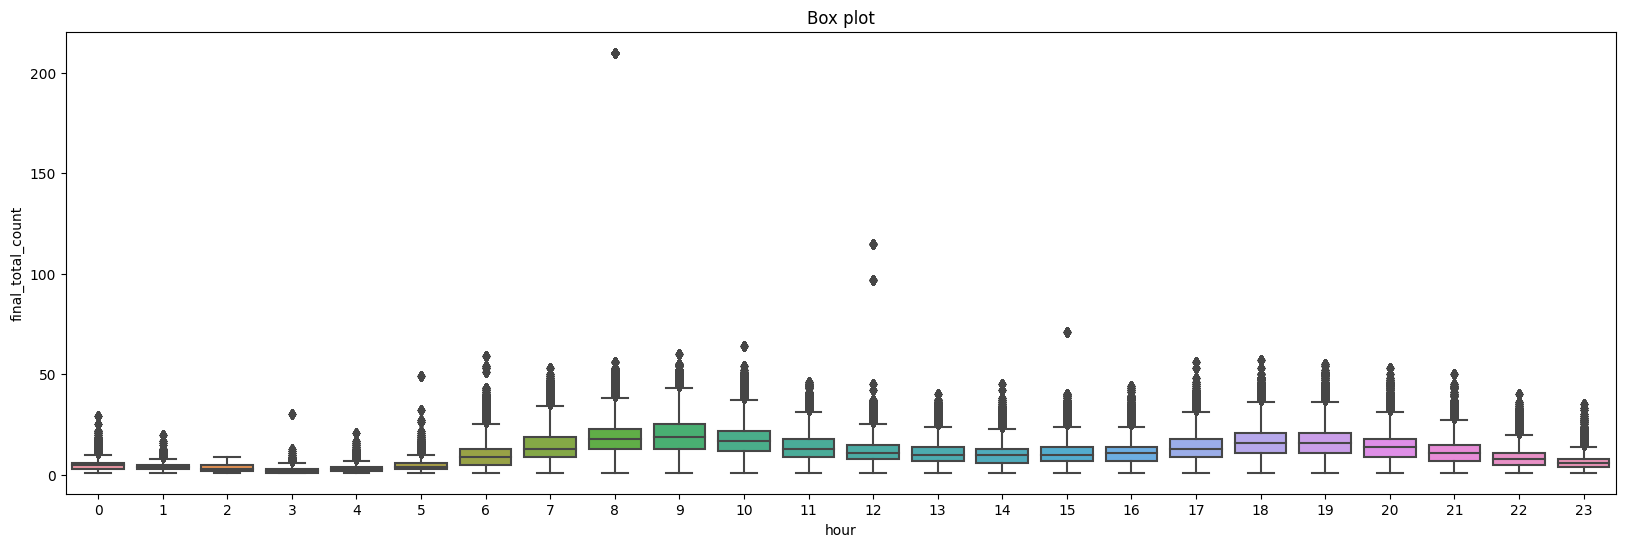

In [157]:
boxplot_features(hourly_df, 'hour', 'final_total_count')

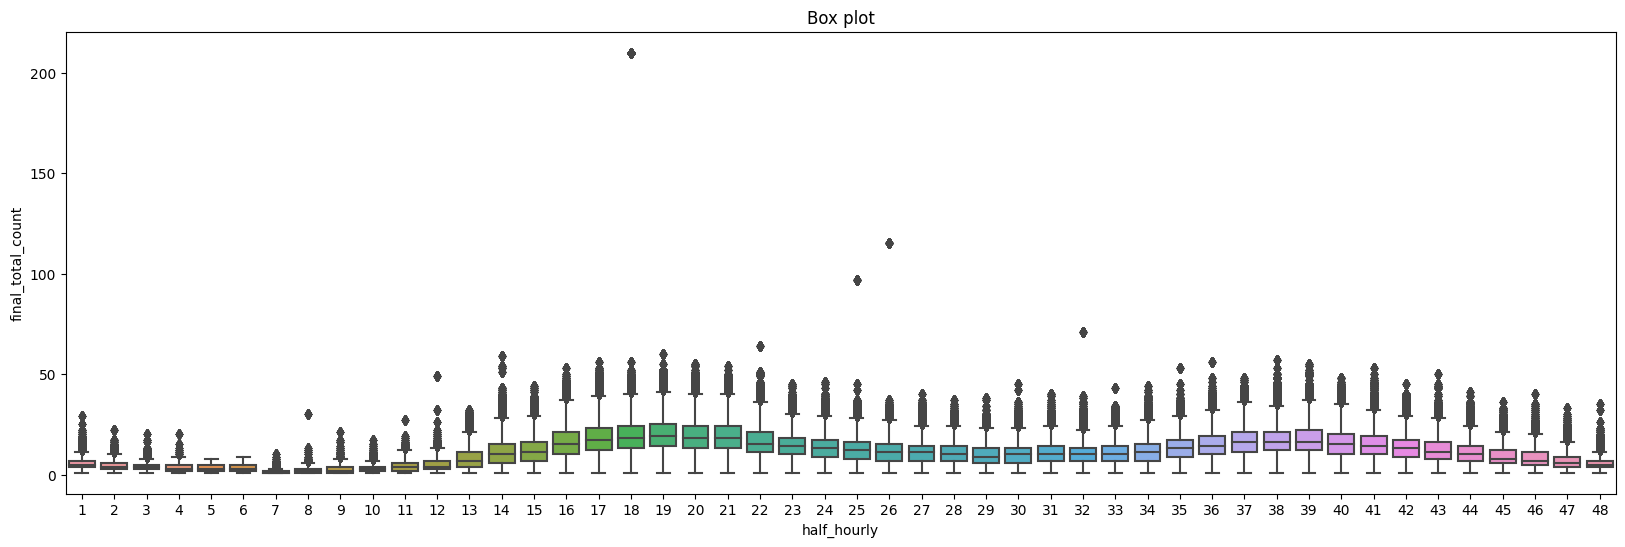

In [158]:
boxplot_features(half_hourly_df, 'half_hourly', 'final_total_count')

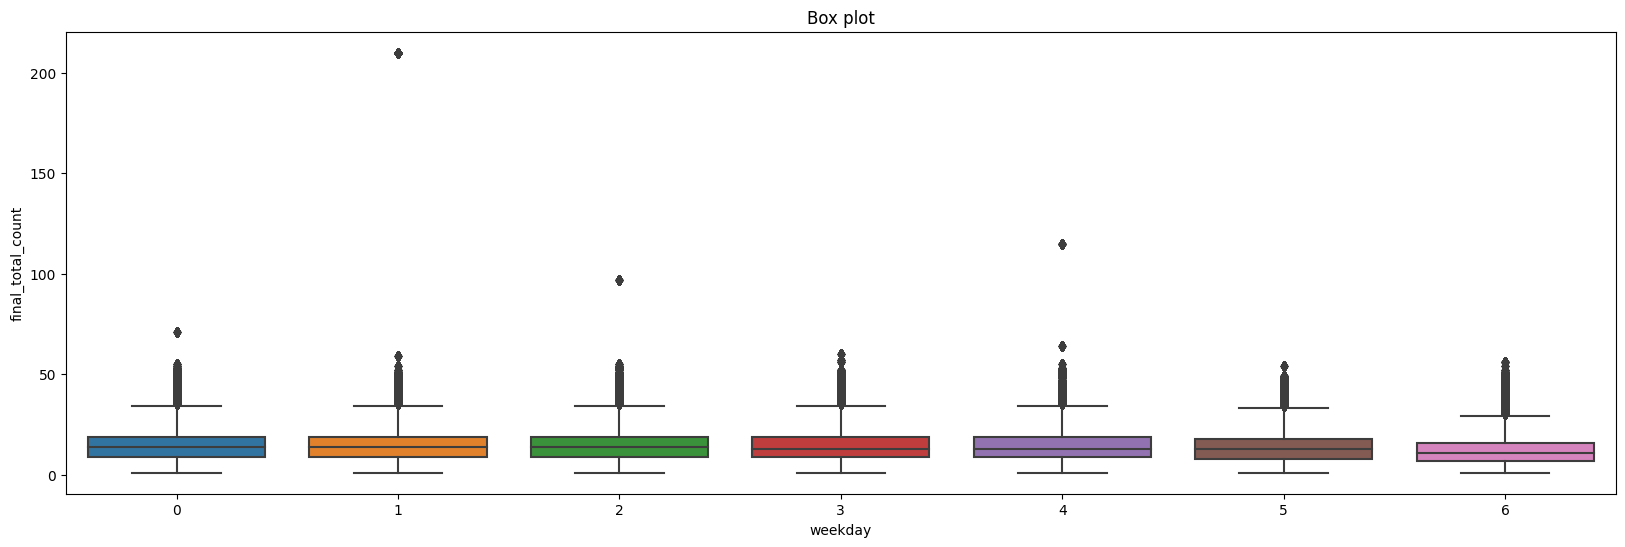

In [161]:
boxplot_features(hourly_df, 'weekday', 'final_total_count')

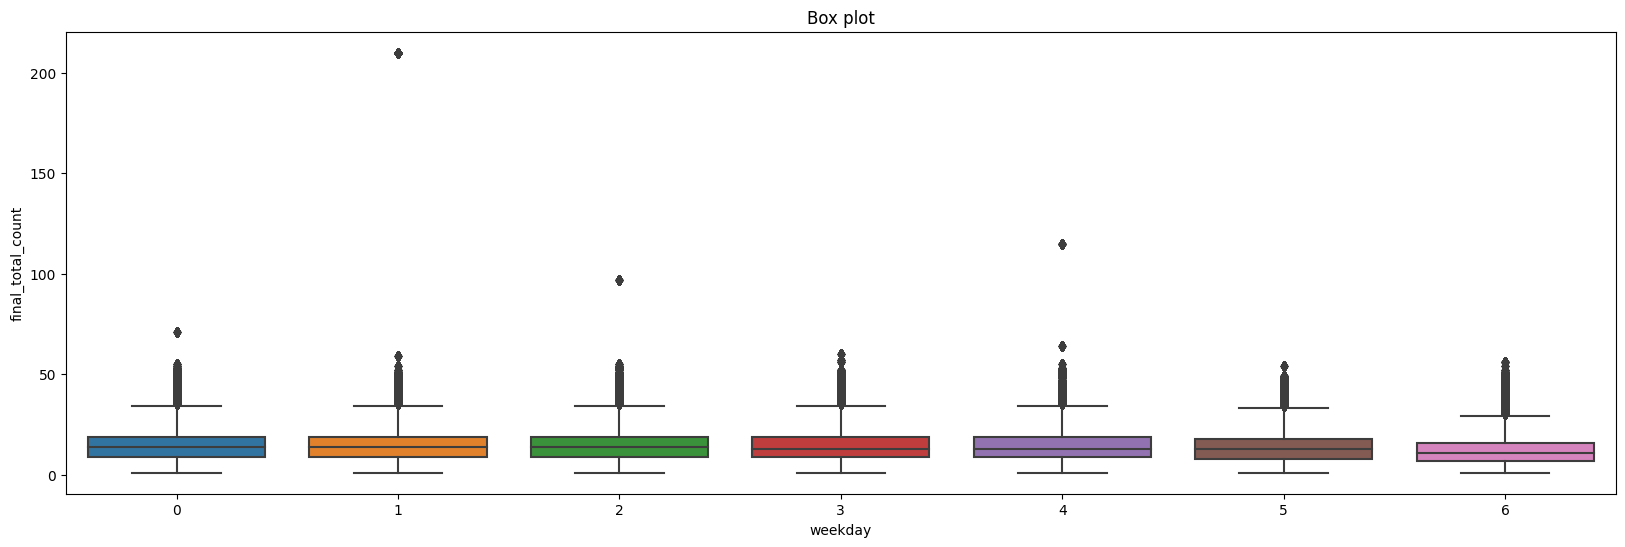

In [162]:
boxplot_features(half_hourly_df, 'weekday', 'final_total_count')

## Seasonal Decompose - have to perform later

In [45]:
new_hour.drop(['id'], inplace=True, axis=1)

/tmp/ipykernel_34/4165989760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_hour.drop(['id'], inplace=True, axis=1)


In [95]:
new_hour['Date_Time'] = pd.to_datetime(new_hour['Date_Time'])

/tmp/ipykernel_34/614448810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_hour['Date_Time'] = pd.to_datetime(new_hour['Date_Time'])


In [96]:
new_hour.set_index('Date_Time', inplace = True)

In [97]:
type(new_hour.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [101]:
sd = seasonal_decompose(new_hour['final_total_count'], model='multiplicative', period=24, two_sided=True, extrapolate_trend=0)

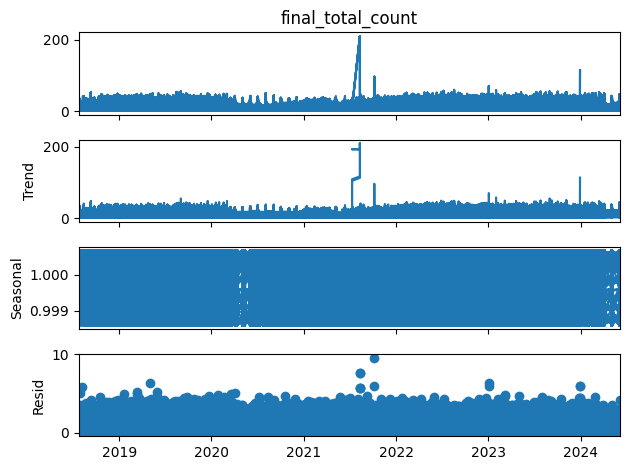

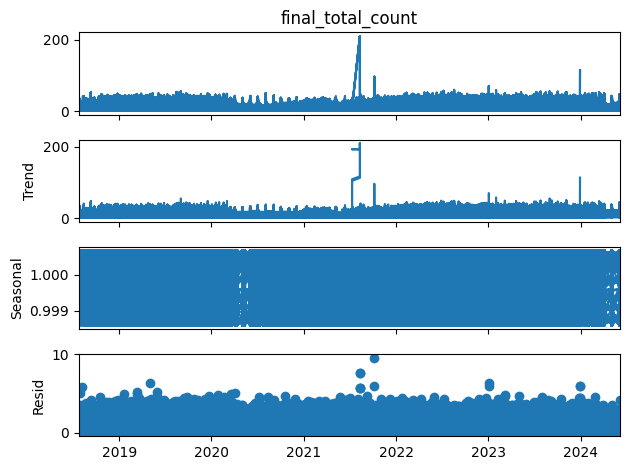

In [102]:
sd.plot()

In [103]:
trend = sd.trend
seasonality = sd.seasonal
residuals = sd.resid

In [119]:
residuals

Date_Time
2018-07-25 18:28:00   NaN
2018-07-25 18:28:00   NaN
2018-07-25 18:28:00   NaN
2018-07-25 18:29:00   NaN
2018-07-25 18:29:00   NaN
                       ..
2024-06-04 18:58:00   NaN
2024-06-04 18:59:00   NaN
2024-06-04 18:59:00   NaN
2024-06-04 18:59:00   NaN
2024-06-04 18:59:00   NaN
Name: resid, Length: 19260165, dtype: float64

In [112]:
start_date = '2018-07-25 18:28:00'
end_date = '2018-08-25 18:28:00'

partial_trend = trend.loc[start_date:end_date]
partial_seasonality = seasonality.loc[start_date:end_date]
partial_residuals = residuals.loc[start_date:end_date]

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [113]:
partial_trend

Series([], Name: trend, dtype: float64)

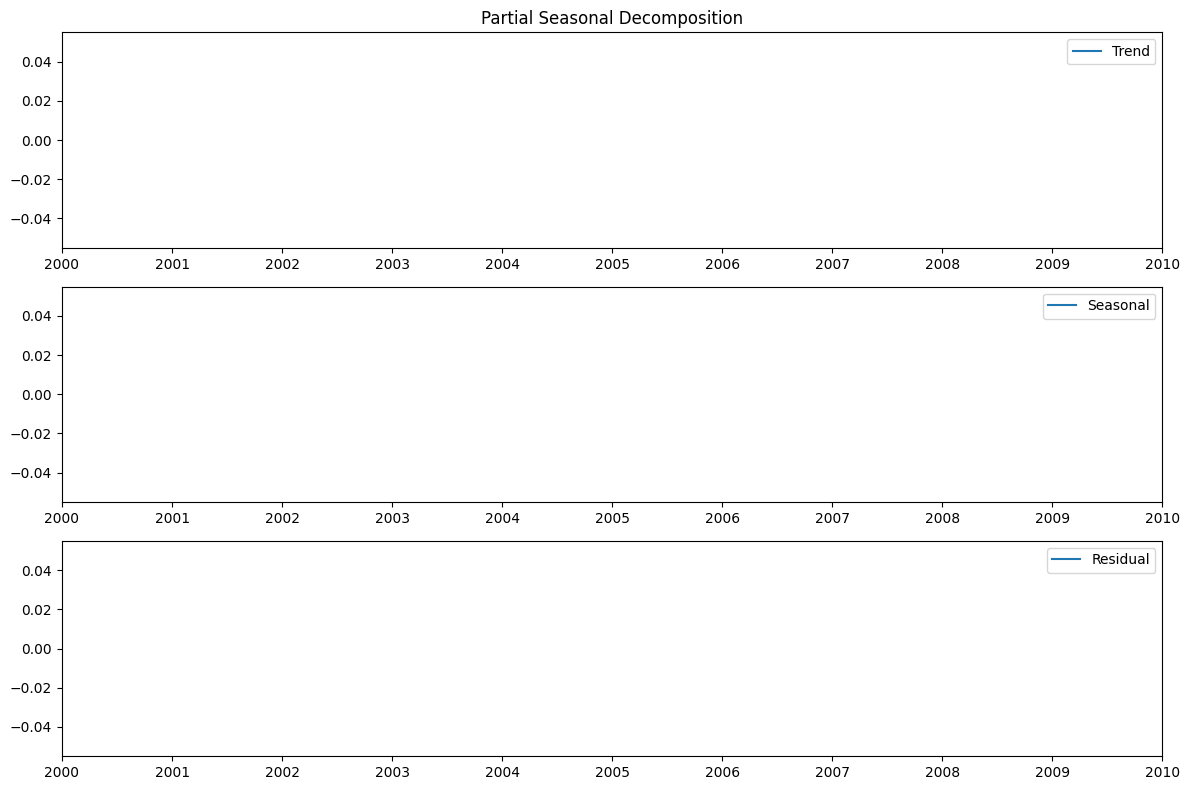

In [64]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(partial_trend, label='Trend')
plt.title('Partial Seasonal Decomposition')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(partial_seasonality, label='Seasonal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(partial_residuals, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()